In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
%matplotlib inline
from keras.utils import plot_model
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Image size
im_width = 400
im_height = 400
path_train_x = 'training/images/'
path_train_y = 'training/groundtruth/'

In [3]:
def load_images(path, x=True):
    ids = next(os.walk(path))[2]
    N = len(ids)
    images = np.empty((len(ids), im_height, im_width, 3 if x else 1)).astype('float32')
    for i, id_ in enumerate(ids):
        if (x):
            img = load_img(path + id_, target_size=(400,400))
        else:
            img = load_img(path + id_, target_size=(400,400), color_mode="grayscale")
        images[i] = img_to_array(img)/255.
    return images

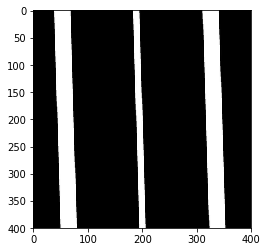

In [13]:
x_train = load_images(path_train_x)
y_train = load_images(path_train_y, x=False)

plt.imshow(y_train[0][:,:,0], cmap="gray")

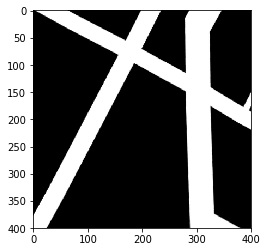

In [20]:
#Arguments for dataset expansion

# We create two instances with the same arguments
data_gen_args = dict(featurewise_center=False,
                     featurewise_std_normalization=False,
                     rotation_range=90,
                     width_shift_range=0,
                     height_shift_range=0,
                     zoom_range=0,
                     horizontal_flip = False)

x_train_datagen = ImageDataGenerator(**data_gen_args)
y_train_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 20
x_train_datagen.fit(x_train, augment=True, seed=seed)
y_train_datagen.fit(y_train, augment=True, seed=seed)

# configure batch size and retrieve one batch of images
for Y_batch in y_train_datagen.flow(y_train, batch_size=1):
    plt.imshow(Y_batch[0][:,:,0], cmap="gray")
    break

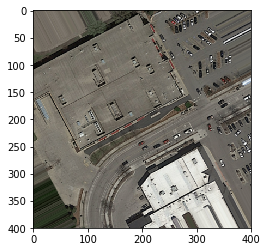

In [21]:
for X_batch in x_train_datagen.flow(x_train, batch_size=1):
    plt.imshow(X_batch[0])
    plt.show()
    break